# Day 10
## Puzzle 1

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [3]:
def prep_data(filename):
    with open(filename) as f:
        lines = f.readlines()
    position, velocity = [], []
    for line in lines:
        s = line.replace('<', '|').replace('>', '|').replace(',', '|').split('|')
        pos = [int(s[1]), int(s[2])]
        vel = [int(s[4]), int(s[5])]
        position.append(pos)
        velocity.append(vel)
    return np.array(position, dtype=int), np.array(velocity, dtype=int)

In [10]:
test_position, test_velocity = prep_data("test_input.txt")
position, velocity = prep_data("input.txt")

In [16]:
def time_step(position, velocity, time):
    return position + velocity*time

def time_step_std(time, position, velocity):
    return time_step(position, velocity, time)[:,1].std()

In [20]:
test = scipy.optimize.minimize_scalar(time_step_std, bracket=[0,10], args=(test_position, test_velocity))
print(test)

     fun: 2.3782484652269633
    nfev: 15
     nit: 11
 success: True
       x: 3.0884101039913356


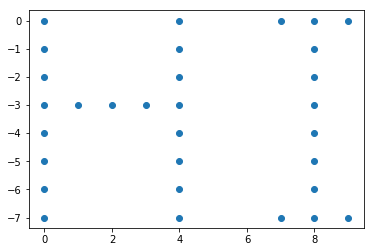

In [24]:
pos = time_step(test_position, test_velocity, 3)
plt.scatter(pos[:,0], -1*pos[:,1])

In [25]:
puzzle1_result = scipy.optimize.minimize_scalar(time_step_std, bracket=[0,100000], args=(position, velocity))

In [26]:
puzzle1_result

     fun: 3.3941560033725917
    nfev: 25
     nit: 21
 success: True
       x: 10866.9751314232

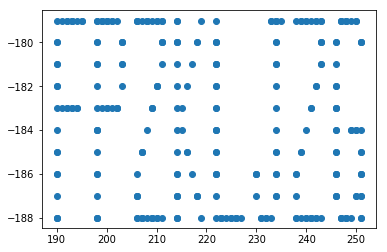

In [27]:
pos = time_step(position, velocity, 10867)
plt.scatter(pos[:,0], -1*pos[:,1])

In [35]:
print("Solution to Puzzle 1 is FPZKLJZG")
print("Solution to Puzzle 1 is ", int(round(puzzle1_result.x)))

Solution to Puzzle 1 is FPZKLJZG
Solution to Puzzle 1 is  10867
